<a href="https://colab.research.google.com/github/chetana0504/Brain-Tumor-detection/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

BASE = "/content/drive/MyDrive/Brain_Tumor_Dataset"

print(os.listdir(BASE))
print("Tumor:", len(os.listdir(BASE + "/tumor")))
print("No Tumor:", len(os.listdir(BASE + "/no_tumor")))


['archive.zip', 'tumor', 'no_tumor']
Tumor: 1513
No Tumor: 1502


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    BASE,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    BASE,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 2413 images belonging to 2 classes.
Found 602 images belonging to 2 classes.


In [ ]:
shutil.rmtree(BASE + "/archive (Unzipped Files)")
print("Cleanup complete")


Cleanup complete


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 811s 11s/step - accuracy: 0.5495 - loss: 0.7127 - val_accuracy: 0.6761 - val_loss: 0.6318
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 415s 5s/step - accuracy: 0.6193 - loss: 0.6489 - val_accuracy: 0.6894 - val_loss: 0.6038
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 354s 5s/step - accuracy: 0.7106 - loss: 0.5781 - val_accuracy: 0.7342 - val_loss: 0.5785
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 367s 5s/step - accuracy: 0.7115 - loss: 0.5741 - val_accuracy: 0.7243 - val_loss: 0.5623
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 360s 5s/step - accuracy: 0.7229 - loss: 0.5544 - val_accuracy: 0.7558 - val_loss: 0.5476
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 385s 5s/step - accuracy: 0.7365 - loss: 0.5431 - val_accuracy: 0.7542 - val_loss: 0.5332
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 383s 5s/step - accuracy: 0.7246 - loss: 0.5522 - val_accuracy: 0.7691 - val_loss: 0.5256
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 381s 5s/step - accuracy: 0.7410 - loss: 0.5411 - val_accuracy: 0.7458 - 

In [ ]:
model.save('/content/drive/MyDrive/brain_tumor_resnet50.h5')
print("Model saved")

Model saved


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/brain_tumor_resnet50.h5')
model.summary()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,112,515 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
loss, acc = model.evaluate(val_gen)
print("Validation Accuracy:", acc)


19/19 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.7542 - loss: 0.4986
Validation Accuracy: 0.7475082874298096


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_true = val_gen.classes
y_pred = (model.predict(val_gen) > 0.5).astype(int)

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


19/19 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step
[[127 173]
 [123 179]]
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       300
           1       0.51      0.59      0.55       302

    accuracy                           0.51       602
   macro avg       0.51      0.51      0.50       602
weighted avg       0.51      0.51      0.50       602



In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def grad_cam(img_path, model, last_conv_layer_name="conv5_block3_out"):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    heatmap = conv_outputs[0] @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    heatmap = cv2.resize(heatmap.numpy(), (224,224))
    heatmap = np.uint8(255 * heatmap)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (224,224))
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(6,6))
    plt.imshow(superimposed[:,:,::-1])
    plt.axis('off')
    plt.show()

In [ ]:
# Unfreeze last 30 layers of ResNet50
for layer in model.layers[-30:]:
    layer.trainable = True


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Model Loaded


Saving pred9.jpg to pred9.jpg
📸 Uploaded Image: pred9.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


🧠 RESULT: Tumor Detected


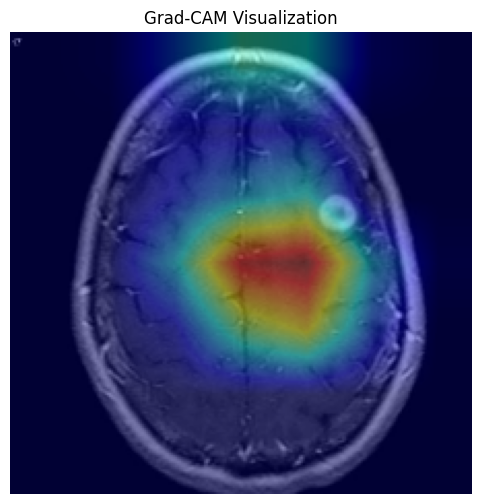

In [ ]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Load trained model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/brain_tumor_resnet50.h5')
print("✅ Model Loaded")

# 3. Upload image manually
from google.colab import files
uploaded = files.upload()

img_path = list(uploaded.keys())[0]
print("📸 Uploaded Image:", img_path)

# 4. Predict Tumor / No Tumor
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("🧠 RESULT: Tumor Detected")
else:
    print("✅ RESULT: No Tumor Detected")

# 5. Grad-CAM Visualization
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

def grad_cam(img_path, model, last_conv_layer_name="conv5_block3_out"):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_output, preds = grad_model(img_array)
        loss = preds[:, 0]

    grads = tape.gradient(loss, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    heatmap = conv_output[0] @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    heatmap = cv2.resize(heatmap, (224,224))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    original = cv2.imread(img_path)
    original = cv2.resize(original, (224,224))

    superimposed = cv2.addWeighted(original, 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(6,6))
    plt.imshow(superimposed[:,:,::-1])
    plt.axis('off')
    plt.title("Grad-CAM Visualization")
    plt.show()

# Run Grad-CAM
grad_cam(img_path, model)